In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics


import pandas as pd
pd.set_option('display.float_format', '{:20,.2f}'.format)

In [3]:
data=pd.read_csv('titanic.csv')

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


<ipython-input-5-54b7f31d4050>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Survived'].sort_values(ascending=True).plot(kind='bar')


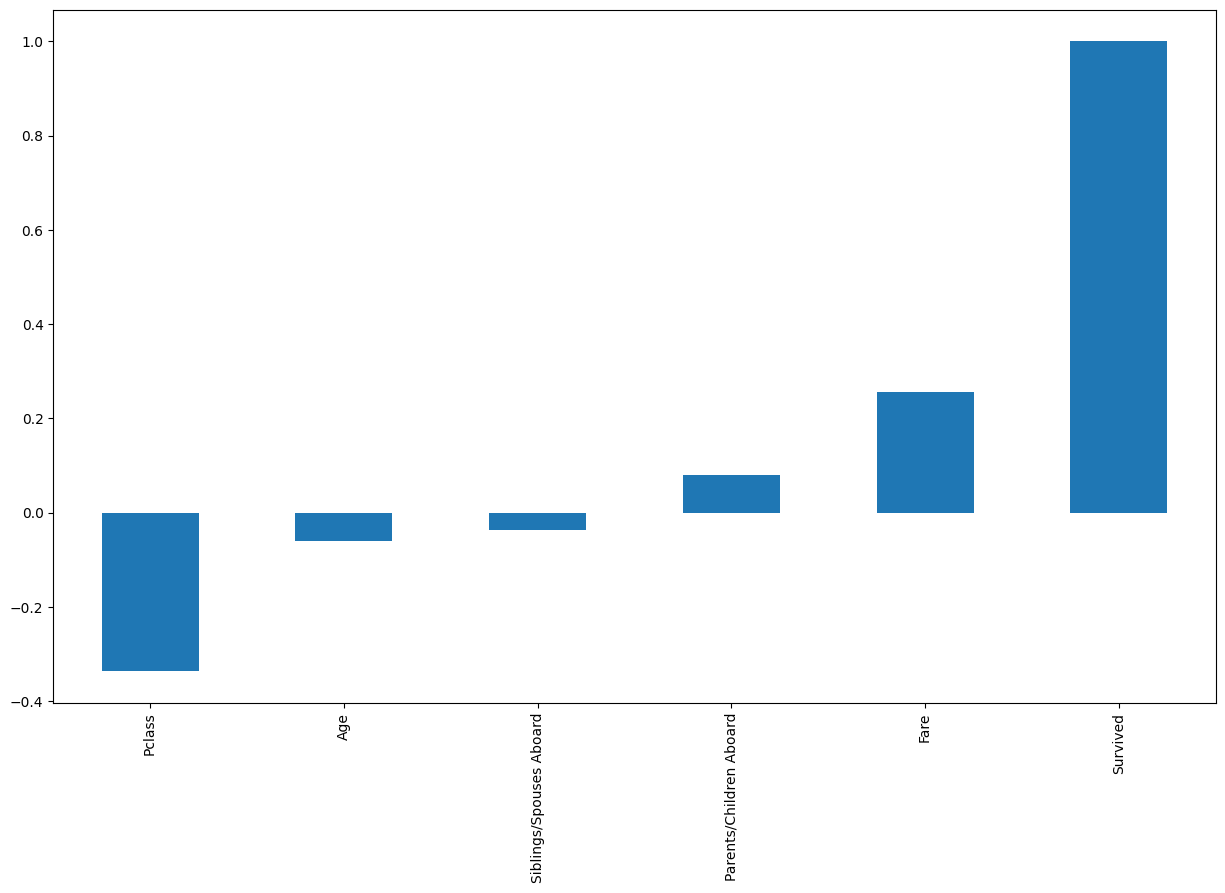

In [5]:
fig = plt.figure(figsize=(15,9))
data.corr()['Survived'].sort_values(ascending=True).plot(kind='bar')
plt.show()

In [ ]:
X=data['absences G1 G2 G3'.split()].copy()

In [ ]:
y=data['pass']

In [ ]:
LogisticR = LogisticRegression(random_state=0)

In [ ]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30, random_state = 00000)
#Entrenando el modelo
LogisticR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#Calculo de las predicciones en Train y Test
y_train_pred = LogisticR.predict(X_train)
y_test_pred = LogisticR.predict(X_test)

In [ ]:

y_test_pred = LogisticR.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred ))
print(metrics.accuracy_score(y_test,y_test_pred ))

1.0
1.0


In [ ]:
#los betas
LogisticR.coef_

array([[-0.06222365, -0.0414681 ,  0.42733068,  3.51318151]])

In [ ]:
#los nombres de las variables
LogisticR.feature_names_in_

array(['absences', 'G1', 'G2', 'G3'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


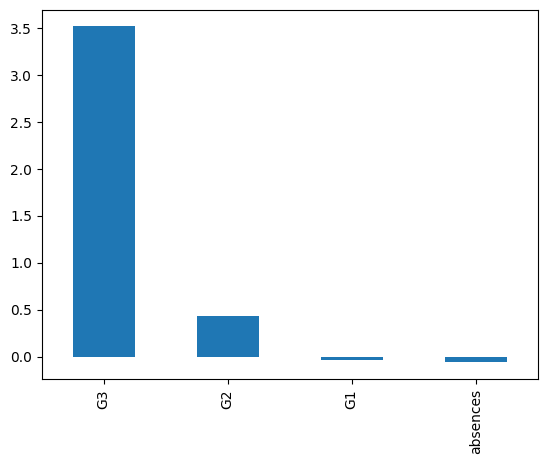

In [ ]:
weights = pd.Series(LogisticR.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

In [ ]:
X[:2]

,absences,G1,G2,G3
0,6,5,6,6
1,4,5,5,6


# las predicciones

In [ ]:
# Con qué probabilidad de dice que es cero o uno, pasó o no el examen
LogisticR.predict_proba(X_test).round(3)

array([[0.   , 1.   ],
       [0.035, 0.965],
       [0.752, 0.248],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.002, 0.998],
       [0.776, 0.224],
       [0.   , 1.   ],
       [0.116, 0.884],
       [0.02 , 0.98 ],
       [0.057, 0.943],
       [0.995, 0.005],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.133, 0.867],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.995, 0.005],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.062, 0.938],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.116, 0.884],
       [0.994, 0.006],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.152, 0.848],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.988, 0.012],
       [0.001, 0.999],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.997, 0.003],
       [0.9

# Cómo testeamos nuestro modelo?

<Figure size 1100x1100 with 0 Axes>

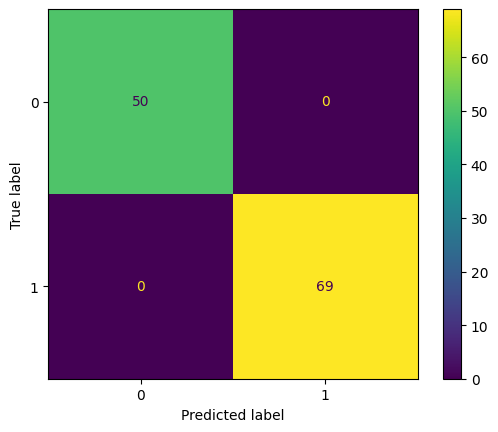

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_test_pred, labels=LogisticR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=LogisticR.classes_)
disp.plot()
plt.show()